In [3]:
import datetime
import math
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import numpy as np
import pandas as pd
import re
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import string

In [4]:
data = pd.read_csv("./data/norm_by_borough_dateime.csv")

In [5]:
data.head(10)

,2014-12-31 04:00:00,2014-12-31 05:00:00,2014-12-31 06:00:00,2014-12-31 07:00:00,2014-12-31 08:00:00,2014-12-31 09:00:00,2014-12-31 10:00:00,2014-12-31 11:00:00,2014-12-31 12:00:00,2014-12-31 13:00:00,...,2015-01-01 19:00:00,2015-01-01 20:00:00,2015-01-01 21:00:00,2015-01-01 22:00:00,2015-01-01 23:00:00,2015-02-01 00:00:00,2015-02-01 01:00:00,2015-02-01 02:00:00,2015-02-01 03:00:00,LOCATION
0,0.044643,0.000000,0.035714,0.062500,0.196429,0.526786,0.482143,0.294643,0.357143,0.491071,...,1.000000,0.660714,0.687500,0.517857,0.464286,0.348214,0.258929,0.125000,0.116071,Barking and Dagenham
1,0.374408,0.004739,0.000000,0.037915,0.184834,0.165877,0.440758,0.587678,0.625592,0.597156,...,1.000000,0.578199,0.933649,0.663507,0.729858,0.454976,0.322275,0.222749,0.094787,Barnet
2,0.000000,0.000000,0.027586,0.041379,0.158621,0.420690,0.579310,0.544828,0.744828,0.482759,...,0.924138,0.606897,0.917241,0.655172,0.848276,0.462069,0.482759,0.206897,0.048276,Bexley
3,0.059603,0.000000,0.006623,0.072848,0.158940,0.158940,0.225166,0.218543,0.264901,0.284768,...,0.456954,0.483444,0.655629,0.503311,0.483444,0.562914,0.443709,0.311258,0.125828,Brent
4,0.030120,0.018072,0.000000,0.120482,0.120482,0.253012,0.343373,0.415663,0.355422,0.355422,...,0.897590,0.704819,0.897590,0.969880,0.692771,0.500000,0.331325,0.060241,0.090361,Bromley
5,0.000000,0.000000,0.041667,0.107143,0.238095,0.446429,0.464286,0.708333,0.642857,0.773810,...,0.666667,0.660714,0.648810,0.601190,0.494048,0.511905,0.148810,0.130952,0.125000,Camden
6,0.015625,0.000000,0.093750,0.140625,0.500000,0.515625,0.593750,0.812500,0.875000,0.796875,...,0.203125,0.359375,0.125000,0.265625,0.359375,0.031250,0.078125,0.031250,0.000000,City of London
7,0.078049,0.014634,0.000000,0.063415,0.131707,0.112195,0.287805,0.365854,0.497561,0.458537,...,0.536585,0.712195,1.000000,0.697561,0.580488,0.297561,0.278049,0.097561,0.156098,Croydon
8,0.024390,0.048780,0.036585,0.085366,0.128049,0.170732,0.347561,0.396341,0.463415,0.268293,...,0.506098,0.457317,0.475610,0.323171,0.378049,0.396341,0.134146,0.115854,0.085366,Ealing
9,0.151899,0.105485,0.000000,0.046414,0.021097,0.097046,0.206751,0.122363,0.168776,0.185654,...,0.915612,0.443038,0.713080,0.662447,0.772152,0.666667,0.265823,0.236287,0.143460,Enfield


In [6]:
reduced_data = PCA(n_components=2).fit_transform(data.loc[:, data.columns != "LOCATION"])

In [7]:
# reduced_data.explained_variance_ratio_.sum()

In [8]:
best = {"n_clusters": 0, "score": 0}

for n_clusters in range(2,20):
    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10, random_state=1).fit(reduced_data)
    labels = kmeans.labels_
    score = metrics.silhouette_score(reduced_data, labels, metric='euclidean')
    print("n_clusters", n_clusters)
    print("score", score)
    print("----------")
    if score > best["score"]:
        best["n_clusters"] = n_clusters
        best["score"] = score

print(best["n_clusters"], best["score"])

n_clusters 2
score 0.4041097883670617
----------
n_clusters 3
score 0.43270794757506575
----------
n_clusters 4
score 0.4752265099922422
----------
n_clusters 5
score 0.4816949587157265
----------
n_clusters 6
score 0.40768397493015335
----------
n_clusters 7
score 0.409311124619678
----------
n_clusters 8
score 0.42369496329880013
----------
n_clusters 9
score 0.42766322471021184
----------
n_clusters 10
score 0.42415356574537577
----------
n_clusters 11
score 0.4257661727007043
----------
n_clusters 12
score 0.40942087686744705
----------
n_clusters 13
score 0.3924937742566097
----------
n_clusters 14
score 0.4041608059874598
----------
n_clusters 15
score 0.39043790804325784
----------
n_clusters 16
score 0.3809798511194262
----------
n_clusters 17
score 0.35338155727497156
----------
n_clusters 18
score 0.3644554854034957
----------
n_clusters 19
score 0.33821269420446193
----------
5 0.4816949587157265


In [9]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10, random_state=1).fit(reduced_data)

In [10]:
data = pd.DataFrame(reduced_data, columns=['x', 'y'])

In [11]:
sns.__version__

'0.8.1'

In [12]:
sns.scatterplot(x="x", y="y", data=data)

AttributeError: module 'seaborn' has no attribute 'scatterplot'

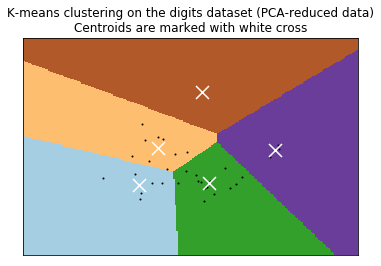

In [13]:
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


In [14]:
data.shape

(33, 2)

In [15]:
# 5 clusters 
# [1, 1, 1, 2, 1, 3, 4, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 3, 2, 0, 2, 2, 2, 3]

# 4 clusters                                                            x                    x  x
# [3, 3, 3, 2, 3, 0, 2, 3, 2, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 2, 3, 2, 1, 1, 3, 1, 0, 2, 1, 2, 1, 1, 0]

In [16]:
kmeans.labels_

array([1, 1, 1, 2, 1, 3, 4, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 2,
       0, 2, 1, 0, 3, 2, 0, 2, 2, 2, 3], dtype=int32)

In [17]:
data["Cluster"] = kmeans.labels_

In [56]:
data[["LOCATION", "Cluster"]].to_csv("./data/borough_to_cluster.csv", index=False)

Automatically created module for IPython interactive environment
For n_clusters = 5 The average silhouette_score is : 0.4816949587157265


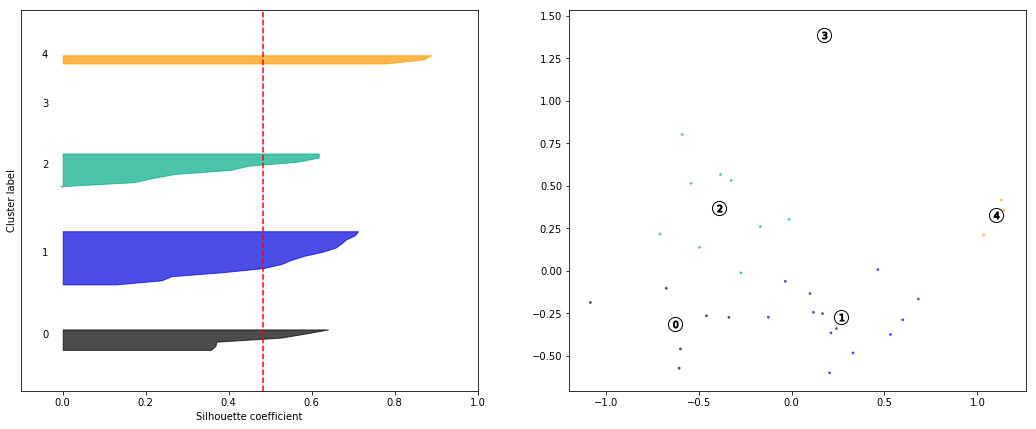

In [23]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X, y = make_blobs(n_samples=500,
#                   n_features=2,
#                   centers=4,
#                   cluster_std=1,
#                   center_box=(-10.0, 10.0),
#                   shuffle=True,
#                   random_state=1)  # For reproducibility

# )
X = reduced_data

# range_n_clusters = [3, 4, 5, 6, 7]

range_n_clusters = [5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

#     ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')


#     plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
#                   "with n_clusters = %d" % n_clusters),
#                  fontsize=14, fontweight='bold')

plt.show()

In [55]:
data[data.Cluster == 3].LOCATION.values.size

3